## Контекст
Набор данных включает данные нескольких датчиков, собранных с синхронного двигателя с постоянными магнитами (PMSM), установленного на испытательном стенде. PMSM представляет собой прототип немецкой OEM-модели. Измерения испытательного стенда были собраны отделом LEA Падерборнского университета.

## Содержание
Все записи дискретизируются с частотой 2 Гц (т.е. 1 ряд в 2 секунды). Набор данных состоит из нескольких сеансов измерений, которые можно отличить друг от друга по столбцу «profile_id». Сеанс измерения может длиться от одного до шести часов.

Двигатель приводится в действие разработанными вручную циклами движения, обозначающими  скорость двигателя и крутящий момент.

Токи в d/q-координатах (столбцы «id» и «iq») и напряжения в d/q-координатах (столбцы «ud» и «uq») являются результатом стандартной стратегии управления, пытающейся следовать эталонной скорости и крутящему моменту.
Столбцы «motor_speed» и «torque» представляют собой результирующие величины, достигнутые этой стратегией, полученные из заданных токов и напряжений.

Большинство управляемых циклов обозначают случайные блуждания в плоскости скорость-крутящий момент, чтобы более точно имитировать циклы реального мира.


## Вдохновение
Наиболее интересными целевыми характеристиками являются температура ротора ("pm"), температура статора ("stator_") и крутящий момент ("torque").

В частности, температура ротора и крутящий момент не могут быть надежно и экономически измерены в коммерческом транспортном средстве.

Возможность иметь надежные средства оценки температуры ротора помогает автомобильной промышленности производить двигатели с меньшим количеством материалов и позволяет  управлять двигателем максимально эфективно.
Точная оценка крутящего момента приводит к более точному и адекватному управлению двигателем, снижению потерь мощности и, в конечном итоге, накоплению тепла.

## Примечания

1. profile_id это номер сессии испытаний. т.е. в датасете несколько испытаний и у них есть айдишник, 1 испытание может идти до 6 часов. каждя запись это показатели через 2 секунды от предыдущей. 
2. Значения в данных это отклонения от эталонных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/mariabaranova/Desktop/DS/measures_v2.csv')
df.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17
5,-0.538973,18.901548,19.077108,0.009147,18.290628,0.009636,-0.613635,0.336747,24.573601,18.323862,19.850634,0.476218,17
6,-0.653148,18.941711,19.074583,0.238890,18.292524,0.001337,-1.005647,0.554211,24.576578,18.321936,19.850630,0.670015,17
7,-0.758392,18.960861,19.082499,0.395099,18.294041,0.001422,-1.288384,0.706370,24.574949,18.314655,19.850628,0.752035,17
8,-0.727128,18.973545,19.085533,0.546623,18.291964,0.000577,-1.490530,0.817339,24.567080,18.306925,19.850626,0.910541,17
9,-0.874307,18.987812,19.076025,0.578944,18.287233,-0.001248,-1.634464,0.898013,24.553242,18.301733,19.850624,0.924010,17


**1. Проведите разведочный анализ данных, убедитесь в том, что нет пропущенных значений, выбросов, постройте матрицу корреляций признаков. Постройте pairplot**

In [3]:
df.shape

(1330816, 13)

In [4]:
df.dtypes

u_q               float64
coolant           float64
stator_winding    float64
u_d               float64
stator_tooth      float64
motor_speed       float64
i_d               float64
i_q               float64
pm                float64
stator_yoke       float64
ambient           float64
torque            float64
profile_id          int64
dtype: object

In [5]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [6]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06,1.330816e+06
mean,5.427900e+01,3.622999e+01,6.634275e+01,-2.513381e+01,5.687858e+01,2.202081e+03,-6.871681e+01,3.741278e+01,5.850678e+01,4.818796e+01,2.456526e+01,3.110603e+01,4.079306e+01
std,4.417323e+01,2.178615e+01,2.867206e+01,6.309197e+01,2.295223e+01,1.859663e+03,6.493323e+01,9.218188e+01,1.900150e+01,1.999100e+01,1.929522e+00,7.713575e+01,2.504549e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206992e+01,1.869814e+01,4.278796e+01,-7.869090e+01,3.841601e+01,3.171107e+02,-1.154061e+02,1.095863e+00,4.315158e+01,3.199033e+01,2.318480e+01,-1.374265e-01,1.700000e+01
50%,4.893818e+01,2.690014e+01,6.511013e+01,-7.429755e+00,5.603635e+01,1.999977e+03,-5.109376e+01,1.577401e+01,6.026629e+01,4.562551e+01,2.479733e+01,1.086035e+01,4.300000e+01
75%,9.003439e+01,4.985749e+01,8.814114e+01,1.470271e+00,7.558668e+01,3.760639e+03,-2.979688e+00,1.006121e+02,7.200837e+01,6.146083e+01,2.621702e+01,9.159718e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


<Axes: >

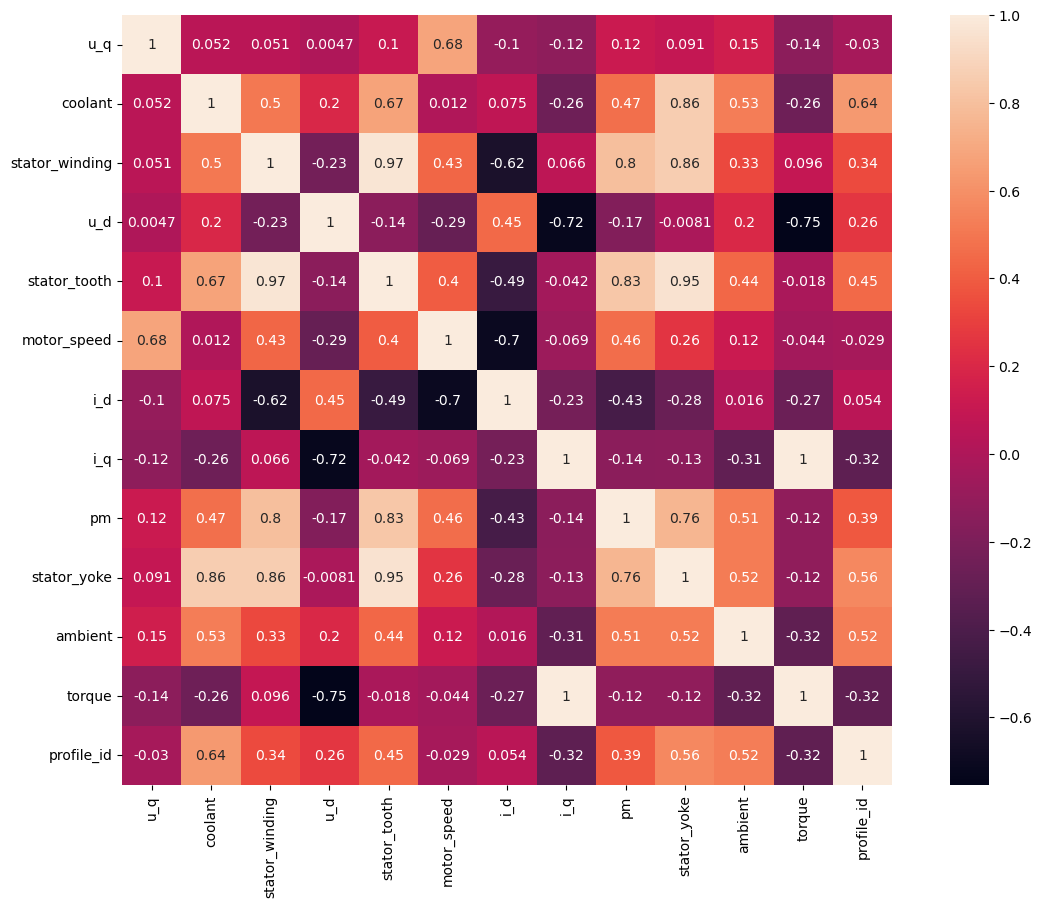

In [7]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

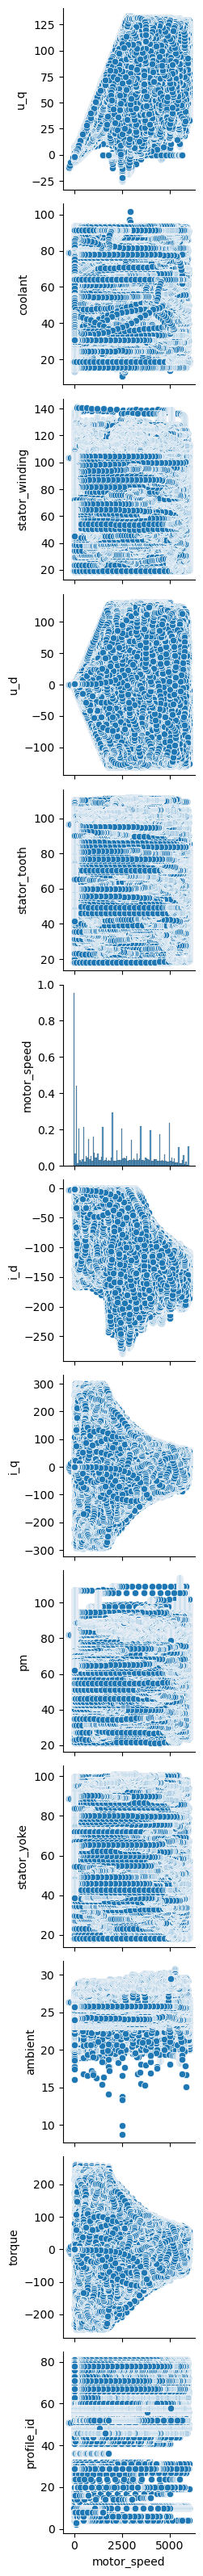

In [8]:
sns.pairplot(df, x_vars=['motor_speed'])
plt.show()

**2. Постройте линейную регрессию. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [9]:
X = df.drop(['motor_speed', 'profile_id'], axis = 1)
y = df['motor_speed']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [11]:
X_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque
1135068,86.822574,37.746803,89.073793,-97.099585,72.121730,-133.512832,55.027483,75.406242,57.468494,26.357057,50.872876
889818,69.078928,29.052020,47.508071,-37.744215,44.951759,-15.493480,70.795235,62.032451,39.428176,24.882011,50.000000
134113,95.330933,17.834719,72.382401,-89.535416,59.674984,-122.239937,55.212883,62.565720,44.386318,25.053989,48.782917
145809,23.702215,18.822914,39.439613,-21.998604,32.121189,-43.513248,132.618027,30.563532,26.421360,22.113173,103.534103
522002,82.139847,19.208147,84.348732,-99.875381,65.583961,-149.968613,47.014805,76.095955,45.895527,25.624050,43.616661


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5, scoring="neg_mean_absolute_error")
print("MAE: {}".format(scores))

MAE: [-339.99375646 -367.22015399 -364.94950197 -368.43506912 -345.89566053]


In [15]:
scores = cross_val_score(lr, X, y, cv=5, scoring="neg_mean_squared_error")
print("MSE: {}".format(scores))

MSE: [-209616.41618121 -229208.74438561 -254914.72895205 -308861.46624048
 -218882.39448005]


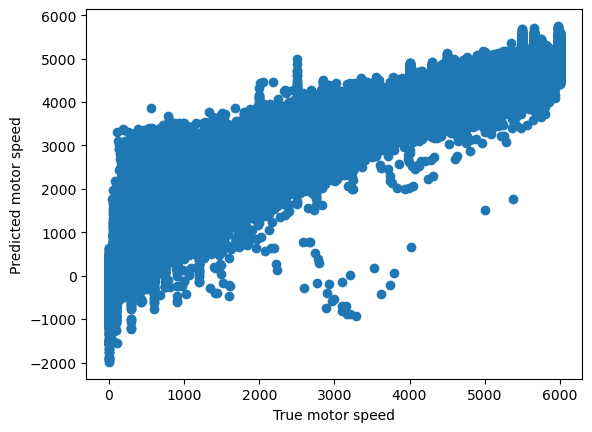

In [16]:
plt.scatter(y_test, y_test_predicted)
plt.xlabel('True motor speed')
plt.ylabel('Predicted motor speed')

plt.show()

**3. Постройте knn. В качестве целевой переменной выступает 'motor_speed'. В качестве метрик используйте MAE и MSE. Используйте перекрестную проверку на 5 фолдах. Провизаулизируйте решения.**

In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [18]:
knn_model = knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [19]:
scores = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_absolute_error")
print("MAE: {}".format(scores))

MAE: [-84.42708295 -75.64690868 -53.53150558 -48.60248451 -44.86141136]


In [20]:
scores = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_squared_error")
print("MSE: {}".format(scores))

MSE: [-22870.25402739 -16071.99456709  -7885.65870644 -10977.50519096
  -7745.67575362]


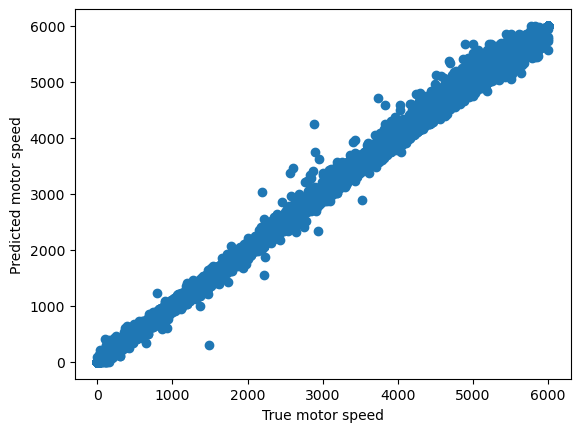

In [21]:
plt.scatter(y_test, y_test_predicted_knn)
plt.xlabel('True motor speed')
plt.ylabel('Predicted motor speed')

plt.show()

**4. Сгенерируйте новые признаки:**
- Нормализация вектора тока. (корень квадратный из сумм квадратов токов)
- Нормализация вектора напряжения. (корень квадратный из сумм квадратов напряжения)
- Полная мощность (произведение нормализованного вектора тока и нормализованного вектора напряжения)
- Эффективная мощность (сумма произведений i_d c u_d и i_q с u_q)

In [22]:
df = df.assign(normal_i = (df['i_d']**2 + df['i_q']**2)**0.5,
         normal_u=(df['u_d']**2 + df['u_q']**2)**0.5)

In [23]:
df = df.assign(full_iu = (df['normal_i']*df['normal_u']))

In [26]:
df = df.assign(effective_iu=df['i_d']*df['i_q'] + df['u_d']*df['u_q'])

In [27]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id,normal_i,normal_u,full_iu,effective_iu
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17,0.004431,0.570659,0.002529,0.157765
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17,0.000992,0.446789,0.000443,0.099611
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17,0.001346,0.577165,0.000777,0.164224
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17,0.002046,0.454893,0.000931,0.103405
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17,0.074292,0.576530,0.042832,0.154159


**5. Заново постройте обе модели, сравните результаты с предыдущими. Провизаулизируйте решения, напишите выводы.**

In [41]:
X_1 = df.drop(['motor_speed', 'profile_id'], axis = 1)
y_1 = df['motor_speed']

In [42]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.15)

In [43]:
X_1_train.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,i_d,i_q,pm,stator_yoke,ambient,torque,normal_i,normal_u,full_iu,effective_iu
737110,22.334286,39.568572,77.152421,-12.536570,64.783082,-16.615799,72.004740,69.495429,53.824769,27.979159,51.144848,73.897006,25.612222,1892.666497,-1476.411645
785515,86.545696,45.849697,71.347856,-17.564226,64.772047,-4.375056,19.283839,70.494525,57.471173,23.613269,12.614756,19.773911,88.310019,1746.234474,-1604.476027
31109,84.119919,18.046318,34.818787,-84.269188,29.949253,-43.513512,132.618210,28.184021,24.908503,23.439882,102.650810,139.574408,119.069126,16619.002740,-12859.401268
555077,16.039499,18.927885,113.099144,-129.958267,84.631157,-203.353806,96.516747,93.321632,57.742931,24.952816,93.497009,225.096096,130.944327,29475.056829,-21711.513237
460874,15.681699,18.858353,61.290112,-130.413300,42.414490,-221.368698,178.109787,43.571037,30.191391,21.647156,172.454498,284.125319,131.352748,37320.641358,-41473.033751


In [44]:
lr = LinearRegression()
lr.fit(X_1_train, y_1_train)

LinearRegression()

In [45]:
y_1_train_predicted = lr.predict(X_1_train)
y_1_test_predicted = lr.predict(X_1_test)

In [46]:

scores = cross_val_score(lr, X_1, y_1, cv=5, scoring="neg_mean_absolute_error")
print("MAE: {}".format(scores))

MAE: [-266.07565785 -238.72475603 -232.20027966 -242.11842234 -211.78366554]


In [47]:
scores = cross_val_score(lr, X_1, y_1, cv=5, scoring="neg_mean_squared_error")
print("MSE: {}".format(scores))

MSE: [-149186.88315601 -134398.45053879 -103219.28931572 -133867.83541741
  -89409.43362291]


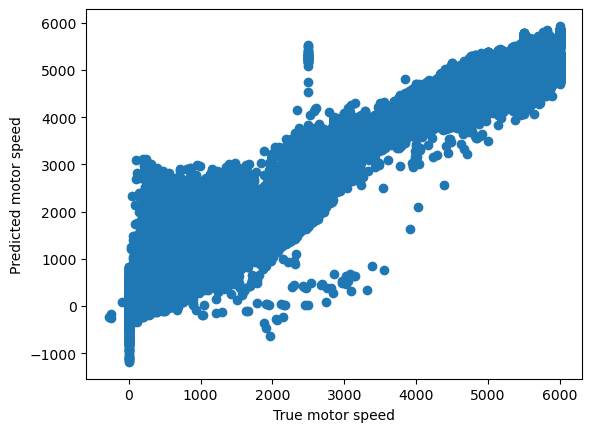

In [48]:
plt.scatter(y_1_test, y_1_test_predicted)
plt.xlabel('True motor speed')
plt.ylabel('Predicted motor speed')

plt.show()

In [53]:
knn_model = knn.fit(X_1_train, y_1_train)
y_1_train_predicted_knn = knn.predict(X_1_train)
y_1_test_predicted_knn = knn.predict(X_1_test)

In [54]:
scores = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_absolute_error")
print("MAE: {}".format(scores))

MAE: [-84.42708295 -75.64690868 -53.53150558 -48.60248451 -44.86141136]


In [55]:
scores = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_squared_error")
print("MSE: {}".format(scores))

MSE: [-22870.25402739 -16071.99456709  -7885.65870644 -10977.50519096
  -7745.67575362]


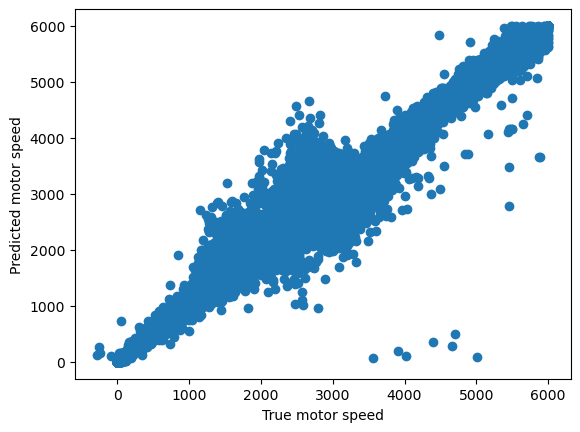

In [56]:
plt.scatter(y_1_test, y_1_test_predicted_knn)
plt.xlabel('True motor speed')
plt.ylabel('Predicted motor speed')

plt.show()

Выводы:
1. Из обученных на исходном датасете моделей качественнее работает модель, обученная методом ближайших соседей (модули ошибок меньше, на графике корреляция между предсказанными и истинными данными на тестовом наборе данных значительно лучше)
2. Сгенерированные расчетные фичи улучшили обучение модели линейной регресии ( уменьшились значения ошибок). При этом корреляция истинных значений и предсказанных моделью, обученной мотодом ближайших соседей на датасете с новыми признаками, стала хуже, хотя значения ошибок практически не отличаются.